In [2]:
import numpy as np
import pandas as pd

# Transition matrix P
P = np.array([
    [0.410, 0.148, 0.049, 0.066, 0.197, 0.131],
    [0.053, 0.561, 0.088, 0.123, 0.175, 0.000],
    [0.045, 0.091, 0.545, 0.159, 0.159, 0.000],
    [0.023, 0.144, 0.114, 0.477, 0.205, 0.068],
    [0.054, 0.108, 0.180, 0.072, 0.532, 0.054],
    [0.056, 0.081, 0.243, 0.108, 0.297, 0.216]
])

# Initial state distribution for group 1
initial_distribution = np.array([11, 8, 17, 13, 30, 39]) / 118

# Predict the distribution at n = 4 using the transition matrix
n_steps = 4
P_n = np.linalg.matrix_power(P, n_steps)
predicted_distribution = initial_distribution @ P_n

# Observed frequencies for group 2 at n = 4 (80 students)
observed_frequencies = np.array([3, 14, 22, 18, 18, 5])
observed_distribution = observed_frequencies / observed_frequencies.sum()

# Create DataFrames for better visualization
transition_matrix_df = pd.DataFrame(P, 
    columns=[f"To {i}" for i in range(1, 7)],
    index=[f"From {i}" for i in range(1, 7)]
)

initial_distribution_df = pd.DataFrame({
    "State": [1, 2, 3, 4, 5, 6],
    "Initial Count": [11, 8, 17, 13, 30, 39],
    "Initial Probability": initial_distribution
})

comparison_df = pd.DataFrame({
    "State": [1, 2, 3, 4, 5, 6],
    "Predicted Distribution (n=4)": predicted_distribution,
    "Observed Distribution (n=4)": observed_distribution
})

# Print results
print("Transition Matrix:")
print(transition_matrix_df)
print("\nInitial Distribution:")
print(initial_distribution_df)
print("\nPredicted vs Observed Distribution:")
print(comparison_df)

Transition Matrix:
         To 1   To 2   To 3   To 4   To 5   To 6
From 1  0.410  0.148  0.049  0.066  0.197  0.131
From 2  0.053  0.561  0.088  0.123  0.175  0.000
From 3  0.045  0.091  0.545  0.159  0.159  0.000
From 4  0.023  0.144  0.114  0.477  0.205  0.068
From 5  0.054  0.108  0.180  0.072  0.532  0.054
From 6  0.056  0.081  0.243  0.108  0.297  0.216

Initial Distribution:
   State  Initial Count  Initial Probability
0      1             11             0.093220
1      2              8             0.067797
2      3             17             0.144068
3      4             13             0.110169
4      5             30             0.254237
5      6             39             0.330508

Predicted vs Observed Distribution:
   State  Predicted Distribution (n=4)  Observed Distribution (n=4)
0      1                      0.073893                       0.0375
1      2                      0.199053                       0.1750
2      3                      0.233062                     

## Validating the model


Predicted student distribution after 4 transitions:  [0.074 0.199 0.233 0.173 0.291 0.048]
Observed student distribution after 4 transitions:  [0.038 0.175 0.275 0.225 0.225 0.062]
Predicted Mean Grade after 4 transitions: 3.61
Observed Mean Grade after 4 transitions: 3.61

Validation Metric (Euclidean Distance): 0.1044


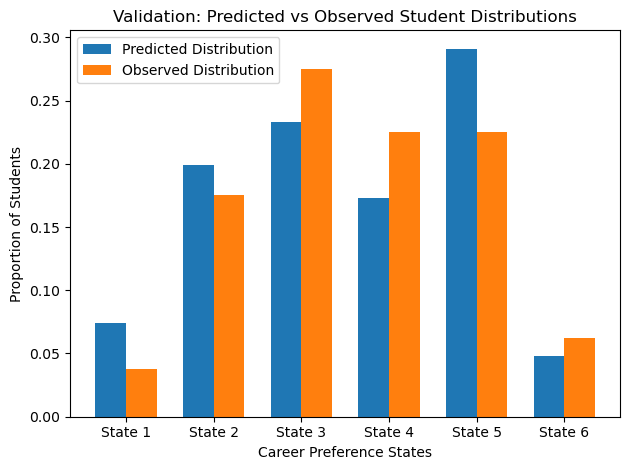

In [6]:
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Replace these with your real data
predicted_pi_4 = np.array([0.074, 0.199, 0.233, 0.173, 0.291, 0.048])
observed_pi_4 = np.array([0.038, 0.175, 0.275, 0.225, 0.225, 0.062])

# Grades for each state (assumed for validation)
grades = np.array([1, 2, 3, 4, 5, 6])
stages = [f"State {i}" for i in range(1, 7)]

# Compute mean grades
predicted_mean_grade = round(np.dot(predicted_pi_4, grades), 2)
observed_mean_grade = round(np.dot(observed_pi_4, grades), 2)

# Euclidean distance
distance = round(euclidean(predicted_pi_4, observed_pi_4), 4)

# Print validation results
print("\nPredicted student distribution after 4 transitions: ", np.round(predicted_pi_4, 3))
print("Observed student distribution after 4 transitions: ", np.round(observed_pi_4, 3))
print(f"Predicted Mean Grade after 4 transitions: {predicted_mean_grade}")
print(f"Observed Mean Grade after 4 transitions: {observed_mean_grade}")
print(f"\nValidation Metric (Euclidean Distance): {distance}")

# Plot validation
def plot_validation(predicted, observed, title):
    x = np.arange(len(stages))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, predicted, width, label='Predicted Distribution')
    ax.bar(x + width/2, observed, width, label='Observed Distribution')

    ax.set_xlabel('Career Preference States')
    ax.set_ylabel('Proportion of Students')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(stages)
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_validation(predicted_pi_4, observed_pi_4, "Validation: Predicted vs Observed Student Distributions")


## Model Accuracy

In [10]:
from sklearn.metrics import mean_absolute_error

# Compute Mean Absolute Error as a measure of accuracy
mae = mean_absolute_error(observed_pi_4, predicted_pi_4)

# Convert MAE to accuracy percentage
accuracy = round((1 - mae) * 100, 2)

print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 96.1%


## Model's accuracy using the Chi-Square test

In [16]:
from scipy.stats import chisquare

# Normalize the distributions to ensure they sum to 1
observed_pi_4 = observed_pi_4 / np.sum(observed_pi_4)
predicted_pi_4 = predicted_pi_4 / np.sum(predicted_pi_4)

# Perform Chi-Square Goodness-of-Fit Test
chi_stat, p_value = chisquare(f_obs=observed_pi_4, f_exp=predicted_pi_4)

# Convert p-value to accuracy (higher p-value indicates better fit)
accuracy = round((1 - p_value) * 100, 2)

# Print the results
print(f"Chi-Square Statistic: {round(chi_stat, 4)}")
print(f"P-Value: {round(p_value, 4)}")

# Interpretation of the model accuracy
if p_value > 0.05:
    print("The model fits well (no significant difference between predicted and observed values).")
else:
    print("The model does not fit well (significant difference between predicted and observed values).")

Chi-Square Statistic: 0.0635
P-Value: 0.9999
The model fits well (no significant difference between predicted and observed values).


## Graph Visualization

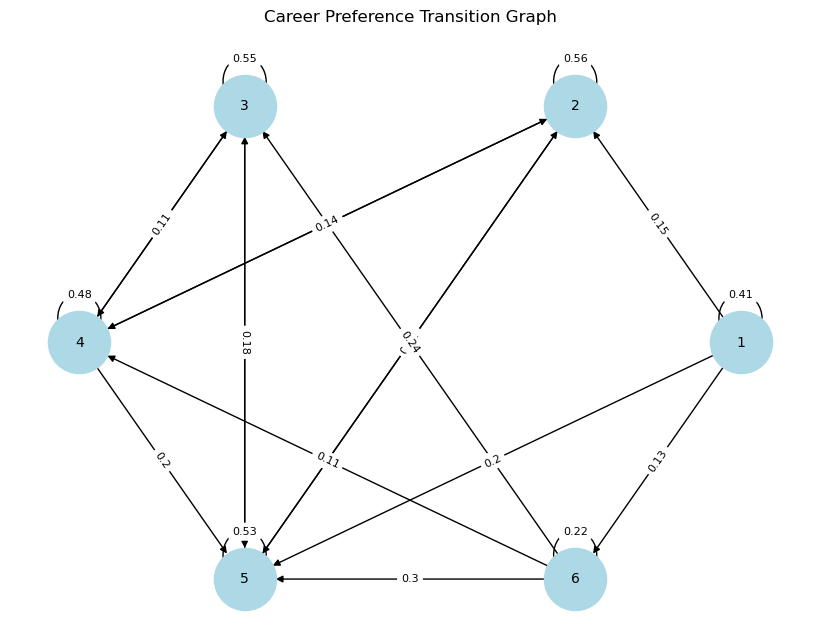

In [20]:
import networkx as nx

# Transition matrix
P = np.array([
    [0.410, 0.148, 0.049, 0.066, 0.197, 0.131],
    [0.053, 0.561, 0.088, 0.123, 0.175, 0.000],
    [0.045, 0.091, 0.545, 0.159, 0.159, 0.000],
    [0.023, 0.144, 0.114, 0.477, 0.205, 0.068],
    [0.054, 0.108, 0.180, 0.072, 0.532, 0.054],
    [0.056, 0.081, 0.243, 0.108, 0.297, 0.216]
])

import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
states = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(states)

# Add edges with weights > threshold
threshold = 0.1
for i in range(6):
    for j in range(6):
        prob = P[i, j]
        if prob > threshold:
            G.add_edge(i + 1, j + 1, weight=round(prob, 2))

# Set layout
pos = nx.circular_layout(G)

# Draw graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Career Preference Transition Graph")
plt.axis('off')
plt.show()